In [5]:
# Installing dependencies 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("C:/Users/Lesly/OneDrive/Documents/sport_e2.csv")

In [7]:
data.head()

,index,importance,sport,frequency,how_alone,how_small_groups,how_big_groups,independence,interdependence,sex,age,education
0,134,7,Martial Arts Tricking,5,False,True,False,4.000000,5.833333,m,26,7
1,135,7,Martial Arts Tricking,5,True,True,True,5.416667,6.583333,m,25,5
2,137,7,Basketball,4,True,True,True,4.166667,5.916667,m,27,8
3,139,7,Parkour,7,True,True,False,4.666667,5.583333,m,18,4
4,140,7,Parkour,6,False,True,False,4.833333,5.833333,m,19,7


In [8]:
data.tail()

,index,importance,sport,frequency,how_alone,how_small_groups,how_big_groups,independence,interdependence,sex,age,education
394,925,6,Soccer,8,False,True,False,5.166667,5.583333,m,22,7
395,926,5,Basketball,2,True,True,False,4.500000,4.333333,f,22,7
396,927,6,Running,5,True,False,False,3.416667,5.166667,f,40,8
397,950,7,Soccer,6,False,False,False,5.166667,5.333333,m,22,7
398,960,7,Skiing,5,False,False,True,4.250000,4.916667,f,22,7


In [9]:
data.columns

Index(['index', 'importance', 'sport', 'frequency', 'how_alone',
       'how_small_groups', 'how_big_groups', 'independence', 'interdependence',
       'sex', 'age', 'education'],
      dtype='object')

In [10]:
data.shape

(399, 12)

In [11]:
data.describe()

,index,importance,frequency,independence,interdependence,age,education
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,531.320802,6.619048,5.308271,4.570175,5.080201,23.764411,7.112782
std,240.561273,0.701927,1.491250,0.712013,0.737761,6.683411,1.179733
min,134.000000,1.000000,1.000000,2.416667,2.083333,12.000000,1.000000
25%,307.500000,6.000000,4.000000,4.166667,4.666667,20.000000,7.000000
50%,533.000000,7.000000,5.000000,4.666667,5.166667,23.000000,7.000000
75%,747.500000,7.000000,6.000000,5.000000,5.583333,25.000000,8.000000
max,960.000000,7.000000,8.000000,6.500000,6.916667,70.000000,9.000000


In [12]:
data.isnull().sum()

index               0
importance          0
sport               0
frequency           0
how_alone           0
how_small_groups    0
how_big_groups      0
independence        0
interdependence     0
sex                 0
age                 0
education           0
dtype: int64

In [13]:
#Visualization
data.head()

,index,importance,sport,frequency,how_alone,how_small_groups,how_big_groups,independence,interdependence,sex,age,education
0,134,7,Martial Arts Tricking,5,False,True,False,4.000000,5.833333,m,26,7
1,135,7,Martial Arts Tricking,5,True,True,True,5.416667,6.583333,m,25,5
2,137,7,Basketball,4,True,True,True,4.166667,5.916667,m,27,8
3,139,7,Parkour,7,True,True,False,4.666667,5.583333,m,18,4
4,140,7,Parkour,6,False,True,False,4.833333,5.833333,m,19,7


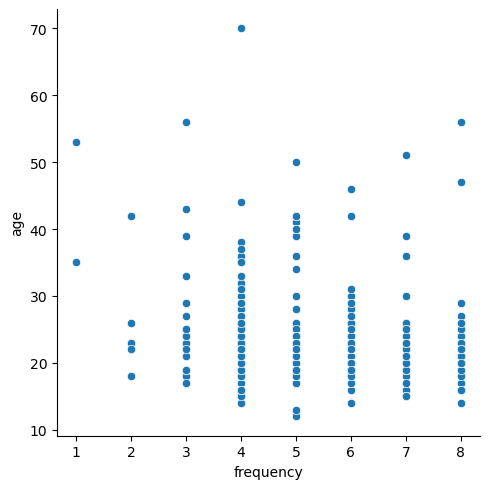

In [14]:
sns.relplot(x='frequency', y = 'age', data=data)

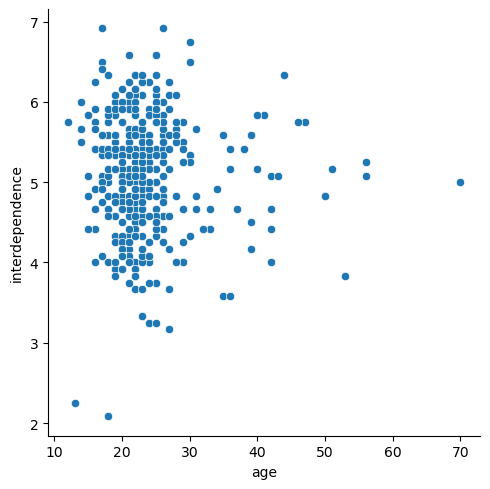

In [15]:
sns.relplot(x = 'age', y = 'interdependence', data=data)

Text(0.5, 1.0, 'Relationship between gender and Interdependence')

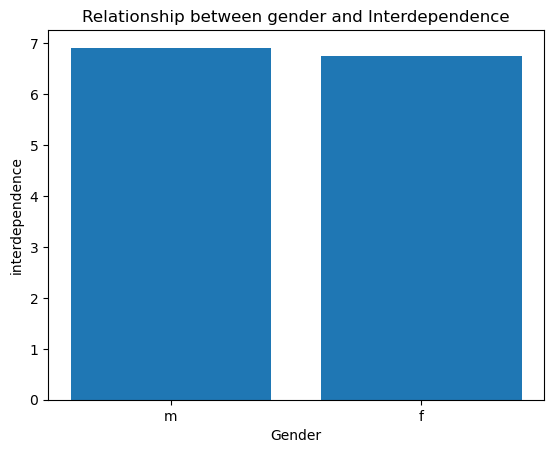

In [16]:
plt.bar(data['sex'], data['interdependence'])
plt.xlabel('Gender')
plt.ylabel('interdependence')
plt.title('Relationship between gender and Interdependence')

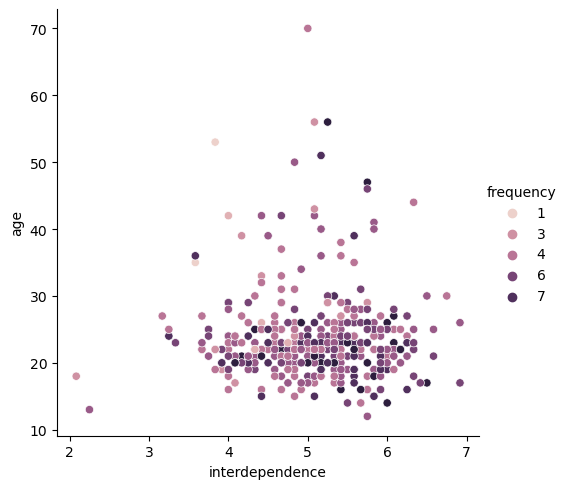

In [17]:
sns.relplot(x='interdependence', y = 'age', hue = 'frequency', data=data)

In [18]:
 #Model
data.head()

,index,importance,sport,frequency,how_alone,how_small_groups,how_big_groups,independence,interdependence,sex,age,education
0,134,7,Martial Arts Tricking,5,False,True,False,4.000000,5.833333,m,26,7
1,135,7,Martial Arts Tricking,5,True,True,True,5.416667,6.583333,m,25,5
2,137,7,Basketball,4,True,True,True,4.166667,5.916667,m,27,8
3,139,7,Parkour,7,True,True,False,4.666667,5.583333,m,18,4
4,140,7,Parkour,6,False,True,False,4.833333,5.833333,m,19,7


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [223]:
train = data.drop(['index','importance','sport','education','sex'], axis=1)
test = data['interdependence']

In [224]:
train_encode = pd.get_dummies(train)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(train_encode, test, test_size=0.4, random_state=3)

In [226]:
 regr = LinearRegression()

In [227]:
regr.fit(X_train, y_train)

LinearRegression()

In [229]:
pred = regr.predict(X_test)

In [230]:
pred

array([5.58333333, 4.83333333, 5.33333333, 6.        , 4.5       ,
       4.33333333, 4.33333333, 5.33333333, 5.08333333, 5.33333333,
       5.5       , 4.5       , 6.25      , 4.91666667, 4.66666667,
       4.91666667, 4.41666667, 4.33333333, 5.33333333, 4.66666667,
       5.83333333, 5.25      , 5.75      , 6.16666667, 5.41666667,
       4.        , 5.91666667, 3.83333333, 4.58333333, 5.        ,
       5.16666667, 5.41666667, 5.75      , 4.66666667, 5.25      ,
       4.41666667, 5.08333333, 5.        , 5.08333333, 6.16666667,
       5.        , 5.66666667, 4.91666667, 5.75      , 5.58333333,
       3.75      , 3.33333333, 5.66666667, 5.41666667, 5.66666667,
       4.66666667, 5.25      , 5.08333333, 5.        , 5.25      ,
       5.        , 4.83333333, 4.75      , 4.58333333, 6.33333333,
       5.75      , 5.25      , 5.25      , 4.41666667, 5.16666667,
       4.25      , 5.58333333, 4.5       , 4.08333333, 5.33333333,
       5.83333333, 5.08333333, 4.41666667, 4.25      , 6.16666

In [91]:
regr.score(X_test, y_test)

0.08119888492631211

In [92]:
regr.score(X_test, y_test)

0.08119888492631211

In [93]:
regr.score(X_test, y_test)

0.08119888492631211

In [101]:
regr.score(X_test, y_test)

0.08003555980322119

In [109]:
regr.score(X_test, y_test)

0.08226202130118698

In [115]:
regr.score(X_test, y_test)

-0.038767514670707826

In [117]:
regr.score(X_test, y_test)

0.12653227731783567

In [136]:
regr.score(X_test, y_test)

0.08226202130118698

In [159]:
regr.score(X_test, y_test)

0.07459126549830042

In [167]:
regr.score(X_test, y_test)

0.07698026297029104

In [182]:
regr.score(X_test, y_test)

0.07698026297029104

In [206]:
regr.score(X_test, y_test)

1.0

In [214]:
regr.score(X_test, y_test)

1.0

In [222]:
regr.score(X_test, y_test)

1.0

In [231]:
regr.score(X_test, y_test)

1.0